<a href="https://colab.research.google.com/github/bharadwaj-vedula/NOOB-DATA-SCIENTIST/blob/master/digit_recognizer_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from tensorflow import keras 
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.layers import Input 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from google.colab import files 
files.upload()

In [0]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 5.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=841dc38867eca54fccd85beea057dfc2ebd13ba8f83122e7d21e919c7c9cd0f6
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure

In [0]:
!kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 34.3MB/s]
100% 15.3M/15.3M [00:00<00:00, 55.4MB/s]


In [0]:
from zipfile import ZipFile
file_name="digit-recognizer.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

"""from zipfile import ZipFile
file_name="test.csv.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

from zipfile import ZipFile
file_name="train.csv.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')"""

Done


'from zipfile import ZipFile\nfile_name="test.csv.zip"\nwith ZipFile(file_name,\'r\') as zip:\n  zip.extractall()\n  print(\'Done\')\n\nfrom zipfile import ZipFile\nfile_name="train.csv.zip"\nwith ZipFile(file_name,\'r\') as zip:\n  zip.extractall()\n  print(\'Done\')'

In [0]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [0]:
df_train.shape,df_test.shape

((42000, 785), (28000, 784))

In [0]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
label_dummies=pd.get_dummies(df_train['label'],drop_first=False)
df_train=pd.concat([df_train,label_dummies],copy=False,axis='columns')

In [0]:
df_train.head()
df_train=df_train.drop(['label'],axis='columns')

In [0]:
df_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
X=df_train.iloc[:,:784]
y=df_train.iloc[:,784:]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,stratify=y,test_size=0.2)

In [0]:
#normalize 
X_train=X_train/255.0
X_test=X_test/255.0

In [0]:
#reshape 
X_train=X_train.values.reshape(-1,28,28,1)

In [0]:
X_test=X_test.values.reshape(-1,28,28,1)

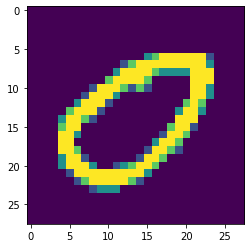

In [0]:
plt.imshow(X_train[0][:,:,0])
plt.show()

In [0]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(32,(5,5),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(10,activation='softmax'))


"""model.add(keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.5))"""

"model.add(keras.layers.Conv2D(256,(3,3),activation='relu'))\nmodel.add(keras.layers.MaxPool2D(2,2))\nmodel.add(keras.layers.Dropout(0.5))"

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0

In [0]:
history=model.fit(X_train,y_train,batch_size=128,epochs=2,validation_data=(X_test,y_test))

Epoch 1/2
263/263 [==============================] - 3s 10ms/step - loss: 0.3373 - accuracy: 0.8898 - val_loss: 0.0799 - val_accuracy: 0.9750
Epoch 2/2
263/263 [==============================] - 2s 9ms/step - loss: 0.0904 - accuracy: 0.9737 - val_loss: 0.0596 - val_accuracy: 0.9824


In [0]:
df_test1=pd.read_csv('test.csv')

In [0]:
df_test1=df_test1/255.0
df_test1=df_test1.values.reshape(-1,28,28,1)

In [0]:
y_pred=model.predict(df_test1)

In [0]:
y_sub=[]
for i in range(len(df_test1)):
  y_sub.append(y_pred[i].argmax())

In [0]:
y_sub

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 9,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 5,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,


In [0]:
submission=pd.DataFrame({'ImageId':[i for i in range(len(df_test1))],'Label':y_sub})
submission.to_csv('submission.csv',index=False)

In [0]:
submission.head(),len(submission)

(   ImageId  Label
 0        0      2
 1        1      0
 2        2      9
 3        3      9
 4        4      3, 28000)

In [0]:
y_pred[0].argmax()

2

In [0]:
len(y_sub)

28000

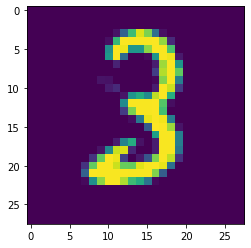

In [0]:
plt.imshow(df_test1[4][:,:,0])

In [0]:

new_input=keras.layers.Input(shape=(28,28,3))

In [0]:
resnet_model=keras.applications.resnet50.ResNet50()

In [0]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
seq_resnet_model=keras.Sequential()

In [0]:
for layer in resnet_model.layers:
  seq_resnet_model.add(layer)

  

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_6:0
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_6:0


ValueError: ignored

In [0]:
seq_resnet_model.add(resnet_model.layers)

TypeError: ignored

In [0]:
vgg16_model=keras.applications.vgg16.VGG16()

In [0]:
seq_vgg16_model=keras.Sequential()

In [0]:
for layer in vgg16_model.layers:
  seq_vgg16_model.add(layer)

In [0]:
seq_vgg16_model.pop()

In [0]:
for layer in seq_vgg16_model.layers:
  layer.trainable=False

In [0]:

model2=keras.Sequential()
model2.add(keras.layers.Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(28,28,1)))
model2.add(seq_vgg16_model)
model2.add(keras.layers.Dense(10,activation='softmax'))

ValueError: ignored